In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_cleaned.xlsx')


In [2]:
gold_price = df['usdpm']
bitcoin_price = df['value']
def cal_volatility(price):
    n = len(price)
    u = np.zeros(n)
    sigma = np.zeros(n)
    temp = 0
    m = 0
    for i in range(n-2):
        m+=1
        u[i+1] =( price[i+1] - price[i])/price[i]
        # print(temp, u[i+1])
        if not np.isnan(u[i+1]):
            temp += u[i+1] ** 2
            sigma[i+2] = np.sqrt(temp/m)
        else:
            # print('nan')
            m -= 1
            sigma[i+2] = sigma[i+1]
        
    return sigma, u
sigma_gold, u_gold = cal_volatility(gold_price)
sigma_bitcoin, u_bitcoin = cal_volatility(bitcoin_price)


0.005880641522986724


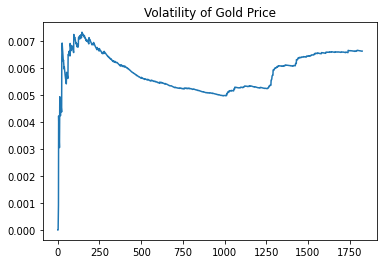

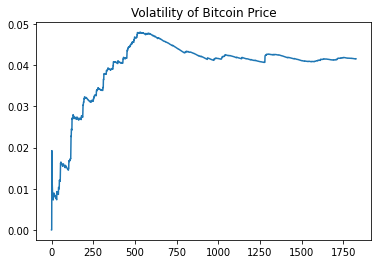

In [3]:
print(np.mean(sigma_gold))
plt.plot(sigma_gold)
plt.title('Volatility of Gold Price')
plt.show()
plt.plot(sigma_bitcoin)
plt.title('Volatility of Bitcoin Price')
plt.show()


In [4]:
df['sigma_gold'] = sigma_gold
df['u_gold'] = u_gold
df['sigma_bitcoin'] = sigma_bitcoin
df['u_bitcoin'] = u_bitcoin

df.to_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_volatility.xlsx')

In [10]:
df = df.drop('Unnamed: 0',axis=1)
df.keys()
df.to_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/2决策模型/data/price_volatility.xlsx')